In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

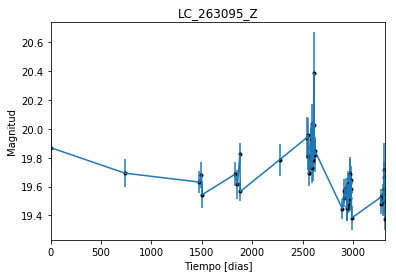

In [2]:
data = np.genfromtxt('LC_263095_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_263095_Z')
plt.savefig("LC_263095_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

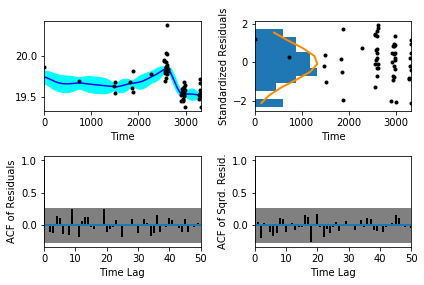

In [5]:
sample.assess_fit()

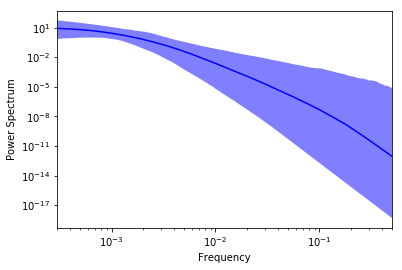

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

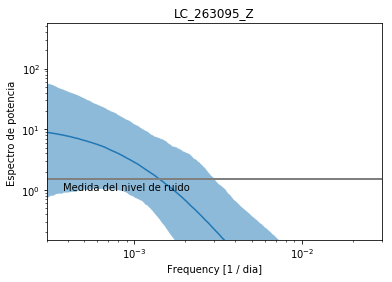

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_263095_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_263095_Z')

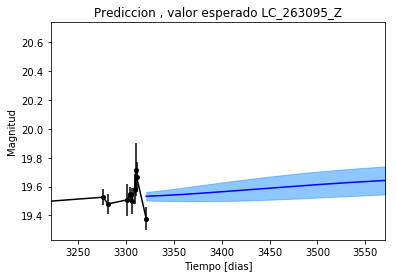

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_263095_Z')

Text(0.5,1,'Prediccion, Caminos simulados_LC_263095_Z')

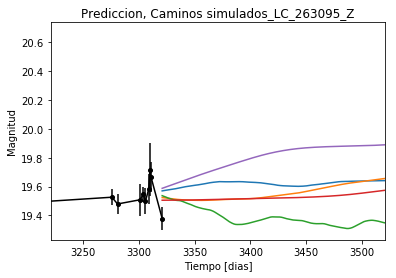

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_263095_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


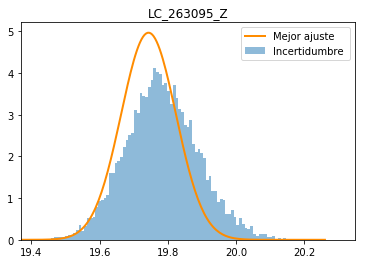

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_263095_Z')
plt.savefig("Mejor_ajuste_LC_263095_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_263095_Z')

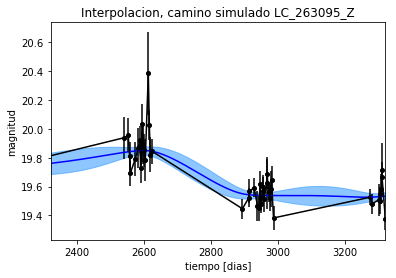

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_263095_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_263095_Z')

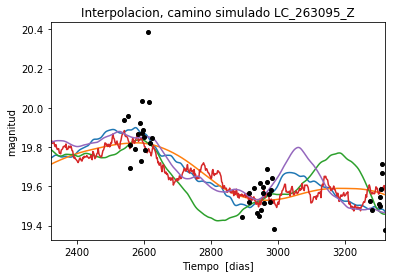

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_263095_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 605.109152612
Median: 0.00936503324221
Standard deviation: 0.180466856896
68% credibility interval: [ 0.00078842  0.165429  ]
95% credibility interval: [  3.37570784e-04   6.94979217e-01]
99% credibility interval: [  3.07060735e-04   9.43465640e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 507.506633634
Median: 0.00168025652235
Standard deviation: 0.0725474926445
68% credibility interval: [ 0.00046796  0.02477909]
95% credibility interval: [ 0.00032104  0.22957993]
99% credibility interval: [  3.04831241e-04   5.33911555e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 433.922329014
Median: 0.0230742610378
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1778.21745486
Median: 63.2503517654
Standard deviation: 1.5301983479
68% credibility interval: [ 61.57236243  64.3084562 ]
95% credibility interval: [ 59.11625908  64.96041572]
99% credibility interval: [ 57.01389602  65.19589628]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 881.592301432
Median: 0.743441726524
Standard deviation: 2.03486287012
68% credibility interval: [ 0.06345698  3.71152751]
95% credibility interval: [ 0.01442314  6.97668846]
99% credibility interval: [ 0.01037347  9.27948675]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 253.058101738
Median: 0.297743253702
Standard deviation: 7.52369367064
68% credibility interval: [ 0.01404114  6.24078033]
95% credibility interval: [  6.82438437e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 3072.52125341
Median: 1.42058678743e-29
Standard deviation: 4.9820539364e+111
68% credibility interval: [  4.80353195e-85   4.04474482e-06]
95% credibility interval: [  2.16248998e-157   1.34260845e+051]
99% credibility interval: [  4.14613552e-167   7.11143192e+098]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3581.82766479
Median: 19.6746771545
Standard deviation: 0.077880396484
68% credibility interval: [ 19.61108603  19.74187118]
95% credibility interval: [ 19.52547509  19.84123264]
99% credibility interval: [ 19.43359407  19.91807149]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 173.398259824
Median: 0.00263283126492
Standard deviation: 0.218388958942
68% credibility interval: [ 0.          0.28420757]
95% credibility interval: [ 0.          0.80494081]
99% credibility interval: [ 0.          0.96972457]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 173.398259824
Median: 0.00263283126492
Standard deviation: 0.218388958942
68% credibility interval: [ 0.          0.28420757]
95% credibility interval: [ 0.          0.80494081]
99% credibility interval: [ 0.          0.96972457]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 840.242375564
Median: 0.0
Standard deviation: 0.000508014064634
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1778.21745486
Median: 63.2503517654
Standard deviation: 1.5301983479
68% credibility interval: [ 61.57236243  64.3084562 ]
95% credibility interval: [ 59.11625908  64.96041572]
99% credibility interval: [ 57.01389602  65.19589628]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1889.24970147
Median: 0.0205791203833
Standard deviation: 0.0303586632131
68% credibility interval: [ 0.01110691  0.04269106]
95% credibility interval: [ 0.00627321  0.09528237]
99% credibility interval: [ 0.0047215   0.17967922]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2041.27503719
Median: 0.998567756096
Standard deviation: 0.151236037113
68% credibility interval: [ 0.86744058  1.157626  ]
95% credibility interval: [ 0.7563345   1.35235542]
99% credibility interval: [ 0.7023533   1.50326074]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 357.645802169
Median: 5.41062978426e-05
Standard deviation: 0.114324648095
68% credibility interval: [  7.73088741e-07   3.08085481e-03]
95% credibility interval: [  3.91320031e-56   1.36461949e-01]
99% credibility interval: [  2.65927936e-103   8.04651769e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 605.109152612
Median: (-0.0588422392687-0.228961776114j)
Standard deviation: 1.78006114905
68% credibility interval: [-1.03942104-0.91174463j -0.00495377-0.00230258j]
95% credibility interval: [ -4.36668320e+00+0.j          -2.12101979e-03-0.08174778j]
99% credibility interval: [ -5.92796945e+00+0.j         -1.92931950e-03-0.0128499j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 507.506633634
Median: (-0.0105573630936+0j)
Standard deviation: 1.44590928788
68% credibility interval: [-0.15569159+0.71976987j -0.00294026+0.j        ]
95% credibility interval: [-1.44249323+0.j         -0.00201718+3.14021854j]
99% credibility interval: [ -3.35466524e+00+4.19188495j  -1.91531118e-03+0.j        ]
Posterior summary for param